In [1]:
import numpy as np
import matplotlib.pyplot as plt

import MicroTools as micro
import MicroTools.plot_tools as pt

import MicroTools.param_scan as param_scan

In [287]:
_, th24, dm241, chi2 = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_0.0_50.dat", unpack=True, )
sin22theta24 = np.sin(2*th24)**2

# g_fixed, th24_fixed, dm241_fixed, chi2_fixed = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_10.0_50.dat", unpack=True, )
# g_fixed, th24_fixed, dm241_fixed, chi2_fixed = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_5.0_50.dat", unpack=True, )
# g_fixed, th24_fixed, dm241_fixed, chi2_fixed = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_2.5_50.dat", unpack=True, )
# g_fixed, th24_fixed, dm241_fixed, chi2_fixed = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_1.0_50.dat", unpack=True, )


g_fixed, th24_fixed, dm241_fixed, chi2_fixed = np.genfromtxt("MinosTools/test_chi2_sterile_g_decay_0.0_50_ue4_0.1.dat", unpack=True, )
sin22theta24_fixed = np.sin(2*th24_fixed)**2

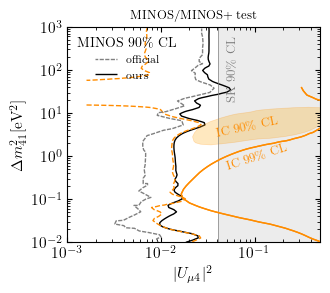

In [289]:

fig, ax1 = pt.std_fig(figsize=(3.2, 1.2 * 2.3617))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"$|U_{\mu 4}|^2$", fontproperties=pt.font)
ax1.set_title('MINOS/MINOS+ test', fontsize=9)
ax1.set_ylim(dm241.min(), dm241.max())
ax1.set_xlim(1e-3, 0.5)

kwargs_interp = {'fine_gridx': 2*len(np.unique(sin22theta24)),  
                'fine_gridy': 2*len(np.unique(dm241)), 
                'logx':True, 
                'logy':True,
                'method': 'interpolate',
                }

cmap_color = 'viridis'
cmin = 0
cmax = 1

# colors = pt.get_cmap_colors(cmap_color, n_sigmas, cmin=cmin, cmax=cmax)
X, Y, Z = pt.interp_grid(sin22theta24, dm241, chi2 - np.min(chi2), **kwargs_interp)
cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.9], 1), colors=['black'], linewidths=1.0, zorder=1, alpha=1)

X, Y, Z = pt.interp_grid(sin22theta24_fixed, dm241_fixed, chi2_fixed - np.min(chi2_fixed), **kwargs_interp)
cs = ax1.contour(X,Y,Z, levels=pt.get_chi2vals_w_CL([0.9], 1), colors=['darkorange'], linewidths=1.0, linestyles=['--'], zorder=1, alpha=1)
# ax1.scatter(1.21e-2,1e3, color='darkorange', marker='x', zorder=2, alpha=1)

x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_90CL.dat', unpack=True)
x,y = pt.get_ordered_closed_region([x,y], logx=True, logy=True)
ax1.fill(x, y, facecolor='orange', edgecolor='darkorange', lw=0.5, ls='-', alpha=0.25, hatch='')
ax1.annotate('IC 90\% CL', xy=(0.038, 2.8), xycoords='data', rotation=12, color='darkorange', fontsize=9)
ax1.annotate('IC 99\% CL', xy=(0.048, 0.5), xycoords='data', rotation=18, color='darkorange', fontsize=9)
x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_99CL.dat', unpack=True)
ax1.plot(x, y, color='darkorange', lw=1, ls='-', alpha=1,zorder=4)

ax1.fill_betweenx([0,1e10], [4.1e-2, 4.1e-2], [1,1], facecolor='grey', edgecolor='grey', lw=0.5, ls='-', alpha=0.15, hatch='', zorder=-1)
ax1.vlines(4.1e-2,0,1e10, color='grey', lw=0.5, ls='-')

ax1.annotate('SK 90\% CL', xy=(5e-2, ax1.get_ylim()[1]/50), xycoords='data', rotation=90, color='grey', fontsize=9)
ax1.set_ylabel(r'$\Delta m_{41}^2 [\mathrm{eV^2}]$', fontproperties=pt.font)

ax1.plot([],[], lw=1, ls=(1,(3,1)), alpha=1, color='grey', label=r'official')
ax1.plot([],[], lw=1, ls=(1,(3,0)), alpha=1, color='black', label=r'ours')
# ax1.plot([],[], lw=1, ls=(1,(3,1)), alpha=1, color='orange', label=fr'$g_\varphi = {g_fixed[0]:.1f}$')
ax1.legend(loc='upper left', fontsize=8, title=r'MINOS 90\% CL')
x, y = np.genfromtxt('MicroTools/osc_data/IceCube_2022_sterile_decay_99CL.dat', unpack=True)
ax1.plot(x, y, color='darkorange', lw=1, ls='-', alpha=1,zorder=4)

x, y = np.genfromtxt(f"MicroTools/osc_data/numu_dis/MINOSPlus_90CL.csv", delimiter=",", unpack=True)
plt.plot(x, y, color='grey', lw=1, ls=(1,(3,1)), alpha=1)
ax1.tick_params(axis='both', which='both', direction='in', bottom=True, top=True, left=True, right=True)
# ax1.tick_params(direction='in', length=3, grid_color='b', grid_alpha=1)
fig.savefig(f"{micro.path_plots}/MH_MINOS_test.png", bbox_inches='tight', dpi=350)